<a id="table_of_contents"></a>
# Overview

This notebook provides a range of data exploration steps illustrated using the dataset 'hdma_lar.csv', which contains a sample of 1000 Mortgage Loan Decisions (approval/denial) from NY state. 

The objective is to illustrate common functionality that pandas and matplotlib provides. The steps covered include:

* <a href='#load_data_basic_summary'>**Load CSV and obtain basic overview of data contents**</a>
* <a href='#basic_data_manipulation'>**Basic data manipulations**</a>
    * <a href='#basic_data_manipulation_bucketing'>Bucketing of data</a>
    * <a href='#basic_data_manipulation_capfloor'>Capping and flooring numericals</a>
    * <a href='#basic_data_manipulation_map'>Mapping and replacing values</a>
* <a href='#numerical_data_exploration'>**Numerical data exploration**</a>
    * <a href='#numerical_data_exploration_histogram'>Histogram and basic chart formatting</a>
    * <a href='#numerical_data_exploration_grouped'>Grouped data, bar plots, box-and-whisker plots</a>
    * <a href='#numerical_data_exploration_scatter'>Scatter plots</a>
* <a href='#categorical_data_exploration'>**Categorical data exploration**</a>
    * <a href='#categorical_data_exploration_frequency'>Frequency tables</a>
    * <a href='#categorical_data_exploration_twoway'>Two-way frequency tables</a>
    * <a href='#categorical_data_exploration_multiway'>Multi-way frequency tables and pivots</a>

**We begin by importing key libraries for data handling and exploration**

In [1]:
# Import key libraries
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

**The following cell imports OW-style formatting for charts, e.g. code and axes styles**

The code is entirely optional, and makes use of two files within the resources folder:
* ow_style.mplstyle, which contains general color and formatting schemes
* ow_colormap.py, which contains code for colormaps that map numbers to a color scale (e.g. for heatmaps)

The mplstyle file is imported using matplotlib's method 'plt.style.use'. The ow_colormap is a regular .py script file that needs to be imported using 'import', and to do so, the path needs to be made available through sys.path. Here we are setting the path to the 'utilities' folder.

In [2]:
# Load in OW color scheme and plot style
plt.style.use('../utilities/resources/ow_style.mplstyle')

# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.append('../utilities')
from resources.ow_colormap import ow_colormap 

<a href="#table_of_contents">(Back to top)</a>
<a id='load_data_basic_summary'></a>
# Load csv containing data into pandas, and get a basic summary of its contents 

We read in the data from a CSV containing 1000 row sample of New York state mortgage application outcomes, and use the following methods to obtain basic information about the contents of the data:
* .info(): Column names, number of non-nulls, and column data type
* .head(): See top rows of each data field
* .describe(): Basic stats for each variable, which we then augment with number of missing or blank values

In [3]:
# Read in the data using pandas, with low_memory=False in case the dataset is large
input_data = pd.read_csv("sample_input/exploration_hmda_lar.csv", low_memory=False)

In [4]:
# Overview of all variables
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   action_taken                    1000 non-null   int64  
 1   action_taken_name               1000 non-null   object 
 2   agency_code                     1000 non-null   int64  
 3   agency_abbr                     1000 non-null   object 
 4   agency_name                     1000 non-null   object 
 5   applicant_ethnicity             1000 non-null   int64  
 6   applicant_ethnicity_name        1000 non-null   object 
 7   applicant_income_000s           910 non-null    float64
 8   applicant_race_1                1000 non-null   int64  
 9   applicant_race_2                5 non-null      float64
 10  applicant_race_3                0 non-null      float64
 11  applicant_race_4                0 non-null      float64
 12  applicant_race_5                0 n

In [5]:
# View the top 3 rows of the data, displaying all columns

pd.set_option('display.max_columns', None) # Show all columns -- only use if needed and data is not extremely wide
input_data.head(3)

,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,applicant_race_name_1,applicant_race_name_2,applicant_race_name_3,applicant_race_name_4,applicant_race_name_5,applicant_sex,applicant_sex_name,application_date_indicator,as_of_year,census_tract_number,co_applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,co_applicant_race_name_1,co_applicant_race_name_2,co_applicant_race_name_3,co_applicant_race_name_4,co_applicant_race_name_5,co_applicant_sex,co_applicant_sex_name,county_code,county_name,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,edit_status,edit_status_name,hoepa_status,hoepa_status_name,lien_status,lien_status_name,loan_purpose,loan_purpose_name,loan_type,loan_type_name,msamd,msamd_name,owner_occupancy,owner_occupancy_name,preapproval,preapproval_name,property_type,property_type_name,purchaser_type,purchaser_type_name,respondent_id,sequence_number,state_code,state_abbr,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
0,1,Loan originated,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,71.0,5,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,1,Male,0,2016,105.0,2,Not Hispanic or Latino,5,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,2,Female,55,Monroe County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Not a HOEPA loan,1,Secured by a first lien,1,Home purchase,1,Conventional,40380.0,Rochester - NY,1,Owner-occupied as a principal dwelling,2,Preapproval was not requested,1,One-to-four family dwelling (other than manufa...,6,"Commercial bank, savings bank or savings assoc...",16-1566654,1164,36,NY,New York,68100,128,1794,1669.0,7.150000,4501,NaN,115.269997
1,3,Application denied by financial institution,7,HUD,Department of Housing and Urban Development,3,"Information not provided by applicant in mail,...",27.0,6,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN,2,Female,0,2016,1014.0,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN,5,No co-applicant,47,Kings County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Not a HOEPA loan,1,Secured by a first lien,3,Refinancing,1,Conventional,35614.0,"New York, Jersey City, White Plains - NY, NJ",1,Owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,0,Loan was not originated or was not sold in cal...,26-4599244,277064,36,NY,New York,72600,210,841,478.0,94.440002,2160,NaN,94.160004
2,1,Loan originated,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,98.0,5,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,1,Male,0,2016,750.0,2,Not Hispanic or Latino,5,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,2,Female,113,Warren County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Not a HOEPA loan,1,Secured by a first lien,1,Home purchase,2,FHA-insured,24020.0,Glens Falls - NY,1,Owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,2,Ginnie Mae (GNMA),95-4623407,25100,36,NY,New York,64800,224,2375,893.0,3.190000,3355,1.71,87.650002


In [6]:
# Obtain a basic description of the columns in the dataset
summary = input_data.describe(include='all')

# Calculate the number of missing and blank values
missing_count = pd.DataFrame({"missing":input_data.isnull().sum()}).T
blank_count = pd.DataFrame({"blanks":(input_data=="").sum()}).T

# Combine the results above
pd.concat([summary, missing_count, blank_count])

,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,applicant_race_name_1,applicant_race_name_2,applicant_race_name_3,applicant_race_name_4,applicant_race_name_5,applicant_sex,applicant_sex_name,application_date_indicator,as_of_year,census_tract_number,co_applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,co_applicant_race_name_1,co_applicant_race_name_2,co_applicant_race_name_3,co_applicant_race_name_4,co_applicant_race_name_5,co_applicant_sex,co_applicant_sex_name,county_code,county_name,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,edit_status,edit_status_name,hoepa_status,hoepa_status_name,lien_status,lien_status_name,loan_purpose,loan_purpose_name,loan_type,loan_type_name,msamd,msamd_name,owner_occupancy,owner_occupancy_name,preapproval,preapproval_name,property_type,property_type_name,purchaser_type,purchaser_type_name,respondent_id,sequence_number,state_code,state_abbr,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,910.000000,1000.000000,5.0,0.0,0.0,0.0,1000,5,0.0,0.0,0.0,1000.000000,1000,1000.000000,1000.0,1000.000000,1000.000000,1000,1000.0000,0.0,0.0,0.0,0.0,1000,0.0,0.0,0.0,0.0,1000.000000,1000,1000.000000,1000,47.000000,14.000000,5.00000,47,14,5,102.0,102,1000.0,1000,1000.000000,1000,1000.000000,1000,1000.000000,1000,966.000000,966,1000.000000,1000,1000.000000,1000,1000.00000,1000,1000.000000,1000,1000,1.000000e+03,1000.0,1000,1000,1000.000000,1000.000000,1000.00000,999.000000,1000.000000,1000.000000,19.000000,1000.000000
unique,NaN,6,NaN,6,6,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,7,1,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,5,NaN,45,NaN,NaN,NaN,6,6,4,NaN,1,NaN,1,NaN,4,NaN,3,NaN,4,NaN,9,NaN,3,NaN,3,NaN,3,NaN,9,181,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Loan originated,NaN,CFPB,Consumer Financial Protection Bureau,NaN,Not Hispanic or Latino,NaN,NaN,NaN,NaN,NaN,NaN,White,White,NaN,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN,NaN,No co-applicant,NaN,Suffolk County,NaN,NaN,NaN,Credit history,Other,Other,NaN,Quality edit failure only,NaN,Not a HOEPA loan,NaN,Secured by a first lien,NaN,Home purchase,NaN,Conventional,NaN,"New York, Jersey City, White Plains - NY, NJ",NaN,Owner-occupied as a principal dwelling,NaN,Not applicable,NaN,One-to-four family dwelling (other than manufa...,NaN,Loan was not originated or was not sold in cal...,0000852218,NaN,NaN,NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,711,NaN,353,353,NaN,775,NaN,NaN,NaN,NaN,NaN,NaN,700,5,NaN,NaN,NaN,NaN,587,NaN,NaN,NaN,NaN,514,NaN,NaN,NaN,NaN,NaN,514,NaN,NaN,NaN,NaN,NaN,514,NaN,179,NaN,NaN,NaN,14,5,2,NaN,102,NaN,1000,NaN,850,NaN,565,NaN,793,NaN,300,NaN,932,NaN,821,NaN,985,NaN,432,94,NaN,NaN,1000,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.030000,NaN,6.657000,NaN,NaN,2.204000,NaN,160.248352,4.941000,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.630000,NaN,0.234000,2016.0,1461.204110,3.698000,NaN,6.6120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.597000,NaN,77.184000,NaN,3.978723,4.857143,5.20000,NaN,NaN,NaN,6.0,NaN,2.0,NaN,1.402000,NaN,1.815000,NaN,1.273000,NaN,36052.198758,NaN,1.079000,NaN,2.804000,NaN,1.02600,NaN,2.160000,NaN,NaN,9.345232e+04,36.0,NaN,NaN,80525.500000,349.446000,1577.85900,1267.606607,28.017220,4840.794000,1.918421,118.199090
std,1.777149,NaN,2.380129,NaN,NaN,0.671442,NaN,455.584548,1.129954,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919753,NaN,0.643162,0.0,2338.923906,1.445298,NaN,1.6316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.576412,NaN,27.334

<a href="#table_of_contents">(Back to top)</a>
<a id='basic_data_manipulation'></a>
# Basic data manipulation that can help during data exploration

This section provides examples for a set of basic data manipulation steps that are frequently used during / as part of data exploration, such as:
* Bucketing of variables (both numeric and categorical)
* Capping, Flooring, and Winsorizing variables
* Replacement / mapping of variables

<a id='basic_data_manipulation_bucketing'></a>
## Bucketing variable values

Bucketing of a variable involves grouping the values of a variables, and serves a variety of potential purposes:
* Reduce granularity of the variable to make plots more intelligible and to reduce overfitting
* Convert numerical variables to categorical, and enable the use of algorithms that require categorical variables
* 

Bucketing can be performed based on manual definitions of buckets, or automated based on e.g. size of the buckets

**In this example, we manually define buckets for a discrete numerical variable**

In this example, we create a 'loan_approval' variable that is "Yes" if action_taken is 1,2, or 6, and "No" otherwise

In [7]:
input_data['loan_approval'] = np.where(
    input_data['action_taken'].isin([1,2,6]),
    "Yes",
    "No"
)

input_data['loan_approval'].value_counts()

Yes    846
No     154
Name: loan_approval, dtype: int64

**In this example, we provide manual cutoffs for bins of a numerical variable**

Bin the applicant_income_000s variable based on manually provided buckets using the 'cut' method from pandas. https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [8]:
input_data['applicant_income_bin'] = pd.cut(
    input_data['applicant_income_000s'],
    bins = [0,500,1000,3000, np.inf], # bins will be created between these cutoffs
    right = False, # True yields (a,b] intervals, while false [a,b) 
    labels = ["Low", "Medium", "High", "Very High"],  # Optional labels, should be one fewer than bins
    include_lowest = True
)

input_data['applicant_income_bin'].value_counts()

Low          876
Medium        22
High          10
Very High      2
Name: applicant_income_bin, dtype: int64

**Next, we automatically create bins of EQUAL WIDTH for a numerical variable**

Bin the applicant_income_000s variable based on equal intervals using the 'cut' method from pandas 
https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [9]:
input_data['applicant_income_bin_2'] = pd.cut(
    input_data['applicant_income_000s'],
    bins = 5 # Number of equally spaced buckets
)

input_data['applicant_income_bin_2'].value_counts()

(7.018, 2013.4]     905
(2013.4, 4009.8]      3
(6006.2, 8002.6]      1
(8002.6, 9999.0]      1
(4009.8, 6006.2]      0
Name: applicant_income_bin_2, dtype: int64

**For skewed variables, using equally distributed bins may offer more informative plots**

Bin the applicant_income_000s variable based on equal distribution using the 'qcut' method from pandas 
https://pandas.pydata.org/docs/reference/api/pandas.qcut.html

In [10]:
input_data['applicant_income_bin_3'] = pd.qcut(
    input_data['applicant_income_000s'],
    q = 5 # Number of same number of observations (tied data may cause some inequal distribution)
)

input_data['applicant_income_bin_3'].value_counts()

(80.6, 108.0]      190
(16.999, 53.0]     187
(165.2, 9999.0]    182
(53.0, 80.6]       177
(108.0, 165.2]     174
Name: applicant_income_bin_3, dtype: int64

<a id='basic_data_manipulation_capfloor'></a>
## Capping, Flooring, and Winsorizing

Variables with outliers may be awkward to analyze. Capping and Flooring the variable can help make charts easier to read. Winsorization is a type of capping and flooring based on percentiles. 

Care is needed when analyzing the relationship between two variables, where one or both variables have outliers. The relationship between variables should not be fundamentally altered when outliers are capped or floored.

**There are many approaches for capping and flooring data**

The clip function is built specifically for capping and flooring variables (numpy and pandas have it). But other methods can be used as well:
* .apply() method for pandas for flexible functions applied to rows or columns of a pandas dataframe
* .minimum() and .maximum() methods for numpy allow for elementwise minimum and maximum to be calculated element-wise (one value by one value)
* .where() method for numpy for an 'if-else' type statement

**Below we show a few different ways to cap a variable**

In [11]:
# Cap applicant_income_000s at 1000
input_data['applicant_income_C1000'] = np.clip(input_data['applicant_income_000s'], a_min=None, a_max=1000)
np.min(input_data['applicant_income_C1000']), np.max(input_data['applicant_income_C1000'])

(17.0, 1000.0)

In [12]:
# Alternative ways of capping the data. Note, that these may treat missing values differently. Make sure to check!
input_data['applicant_income_C1000_1'] = input_data['applicant_income_000s'].clip(lower=None, upper=1000)
input_data['applicant_income_C1000_2'] = input_data['applicant_income_000s'].apply(lambda x: min(x,1000))
input_data['applicant_income_C1000_3'] = np.minimum(input_data['applicant_income_000s'],1000)
input_data['applicant_income_C1000_4'] = np.where(
    input_data['applicant_income_000s'] > 1000, 
    1000, 
    input_data['applicant_income_000s'])

**Next we show how to floor a variable and both floor and cap**

In [13]:
# Floor applicant_income_000s at 100
input_data['applicant_income_F100'] = np.clip(input_data['applicant_income_000s'], a_min=100, a_max=None)

# Floor at 100 and cap at 1000
input_data['applicant_income_F100_C1000'] = np.clip(input_data['applicant_income_000s'], a_min=100, a_max=1000)

**Winsorization involves setting floor and cap at specific quantile values of the data**

Winsorization is frequently used as a simple way of handling outliers, by setting them to values closer to the main distribution of the dataset.

It is good practice to keep track of the specific values of the cut-off, especially for statistical model development (where you may want to predict on individual data points)

A popular method for identifying the thresholds to floor and cap at is numpy's .nanquantile() as it calculates the quantiles for variables with nan / missing values
https://numpy.org/doc/stable/reference/generated/numpy.nanquantile.html

In [14]:
lower_level = np.nanquantile(input_data['applicant_income_000s'], q = 0.05) # 5th percentile
upper_level = np.nanquantile(input_data['applicant_income_000s'], q = 0.99) # 99th percentile

# Then can apply floor and capping code
input_data['applicant_income_P5_P99'] = np.clip(input_data['applicant_income_000s'], a_min=lower_level, a_max=upper_level)

<a id='basic_data_manipulation_map'></a>
## Map or replace values of a variable

There may be reasons to replace values of a variable with other values, e.g.:
* Mispelled string values
* A form of manual bucketing categorical / discrete variables 

Replacement will only replace the specific values provided, whereas mapping will cause unmapped values to be mapped to None / nan

**Example below shows replacement using the .replace() method for pandas series, using a dictionary**

In [15]:
# Here we use the replace method for action taken
replacement_dict = {1: 100, 2: 200}

input_data['action_taken_replaced'] = input_data['action_taken'].replace(replacement_dict)
input_data['action_taken_replaced'].value_counts() # Frequency table

100    711
6      117
3       66
4       57
5       31
200     18
Name: action_taken_replaced, dtype: int64

**Example below shows replacement using the .map() method for pandas series, using a dictionary**

In [16]:
# Here we use the map method for action taken. This will convert anything not covered by the mapping to missing (NaN)
map_dict = {1: 100, 2: 200}

input_data['action_taken_replaced'] = input_data['action_taken'].map(map_dict)
input_data['action_taken_replaced'].value_counts(dropna=False)

100.0    711
NaN      271
200.0     18
Name: action_taken_replaced, dtype: int64

<a href="#table_of_contents">(Back to top)</a>
<a id='numerical_data_exploration'></a>
# Further exploration of numerical variables

This section provides examples of useful plots for numerical variable, such as:
* Histogram plots to examine the distribution of a single variable
* Statistics calculated by group, e.g. average by category to analyze relationship between a numeric and categorical variable 
* Scatterplots to analyze relationship between two numerical variables

<a id='numerical_data_exploration_histogram'></a>
## Histogram plots

Histogram plots are a bar-plot that shows the frequency of a numerical variable by bucket / interval. Matplotlib generates histograms using the hist() method. This method can also be applied to a pandas series directly.

By default, the histogram method will automatically identify the bins -- which are equal-width. This may cause highly skewed variables to have very high concentration in certain bins making it harder to detect outliers. In these circumstances, scaling the chart axes, or transforming the variable may help.  

The cells below provide examples of histograms, starting with basic histograms to more embellished matplotlib charts.

**Basic histogram of applicant income**

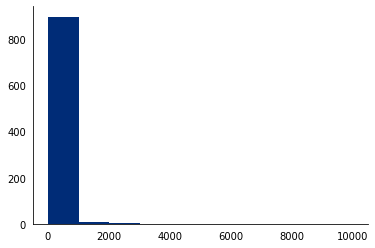

In [17]:
plt.hist(input_data['applicant_income_000s'])
plt.show()

**Adding axes titles and chart header**

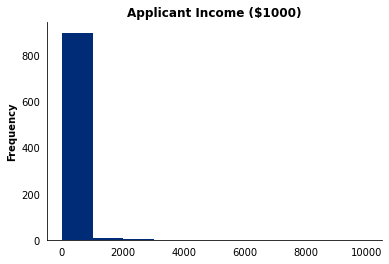

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111) # 1 x 1 grid of charts, with this being plot #1 (the only plot)

ax.hist(input_data['applicant_income_000s'])
ax.set_title("Applicant Income ($1000)")
ax.set_ylabel("Frequency")
plt.show()

**Scaling the x-axis**
A few different ways are considered:
* Scaling the data
* Scaling the axes (resulting in uneven bins)
* Scaling the axes and the bins

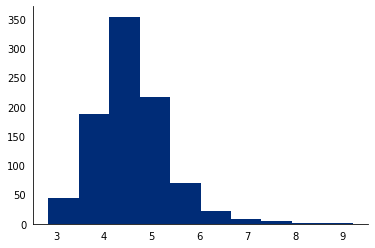

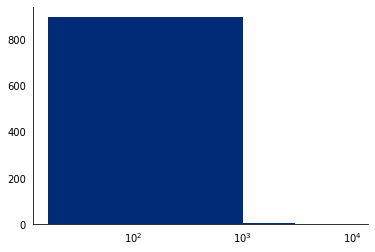

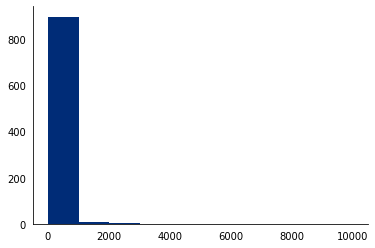

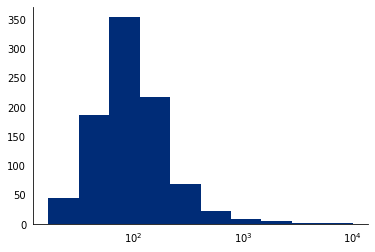

In [19]:
# Scale the x-axis, as most of the data is concentrated at 0-1000

# This can be done by scaling the variable
plt.hist(np.log(input_data['applicant_income_000s'])) 
plt.show()

# Or this can be done by scaling the x-axis, but this doesn't scale the bins!
plt.hist(input_data['applicant_income_000s']) 
plt.xscale('log')
plt.show()

# One can also choose to transform the bins
_, bins, _ = plt.hist(input_data['applicant_income_000s'])
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.figure() # Clear the figure
plt.hist(input_data['applicant_income_000s'], bins=logbins)
plt.xscale('log')
plt.show()

**Capping (or flooring) the data for skewed variables can help zoom in to the 'body' of the distribution**

You can also opt to truncate (remove) outliers for this plot

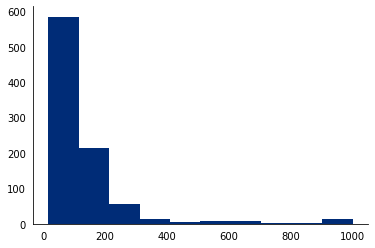

In [20]:
# We cap the data at 1000
plt.hist(np.clip(input_data['applicant_income_000s'],a_min=None, a_max=1000)) 
plt.show()

**Multiple plots in a grid**

Here we offer two ways of creating several plots in a grid, using 'add_subplot' and by using 'axes'. In this example, we have used only histograms, but it is possible to mix and match the plot types

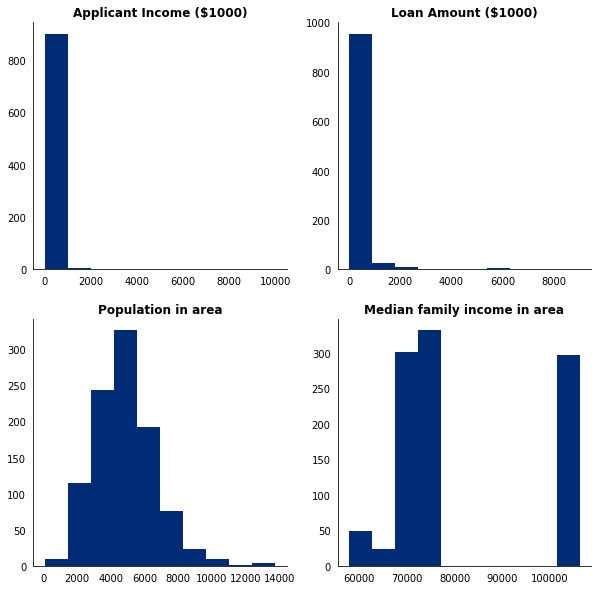

In [21]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221) # 2 x 2 grid of charts, with this being plot #1 (top left)
ax1.hist(input_data['applicant_income_000s'])
ax1.set_title("Applicant Income ($1000)")

ax2 = fig.add_subplot(222) # 2 x 2 grid of charts, with this being plot #2 (top right)
ax2.hist(input_data['loan_amount_000s'])
ax2.set_title("Loan Amount ($1000)")

ax3 = fig.add_subplot(223) # 2 x 2 grid of charts, with this being plot #3 (bottom left)
ax3.hist(input_data['population'])
ax3.set_title("Population in area")

ax4 = fig.add_subplot(224) # 2 x 2 grid of charts, with this being plot #4 (bottom right)
ax4.hist(input_data['hud_median_family_income'])
ax4.set_title("Median family income in area")

plt.show()

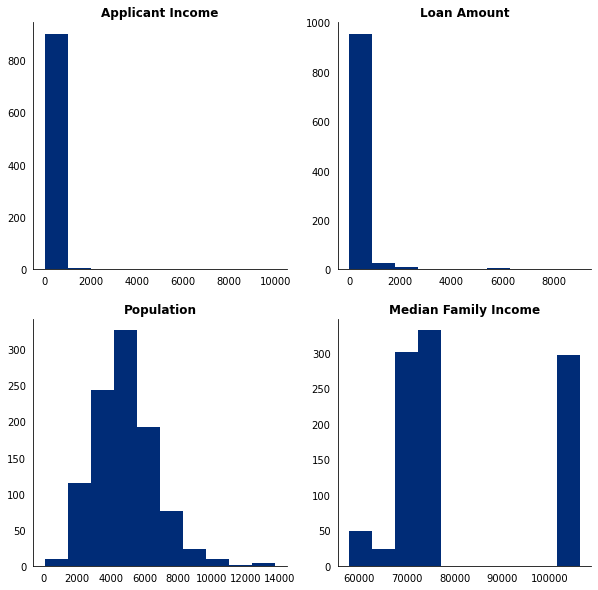

In [22]:
# By treating the axes as a grid
fig, axs = plt.subplots(2, 2, figsize=(10,10)) # 2 by 2 figures
axs[0, 0].hist(input_data['applicant_income_000s'])
axs[0, 0].set_title('Applicant Income')
axs[0, 1].hist(input_data['loan_amount_000s'])
axs[0, 1].set_title('Loan Amount')
axs[1, 0].hist(input_data['population'])
axs[1, 0].set_title('Population')
axs[1, 1].hist(input_data['hud_median_family_income'])
axs[1, 1].set_title('Median Family Income')
plt.show()

<a id='numerical_data_exploration_grouped'></a>
## Grouped averages, bar chart and box-and-whiskers plot by data segment

In this section, we use bar charts and box-and-whisker plots to understand the distribution of a numerical variable in subsegments of the data. This example will examine the applicant income by county, for the top 10 most frequent counties.

If you are calculating groupby's and want to include missing values, use "dropna=False" in the groupby method

**Calculate the average applicant income by county**

In [23]:
# Identify the top 10 most frequent counties and calculate their average applicant income using groupby

counties_count = input_data['county_name'].value_counts()
top_10_counties = counties_count.index.tolist()[:10]
top_10_counties_data = input_data.loc[input_data['county_name'].isin(top_10_counties), ]

summarized_data = top_10_counties_data.groupby("county_name")['applicant_income_000s'].mean()
summarized_data

county_name
Kings County           146.615385
Monroe County           87.317568
Nassau County          157.115044
New York County       1206.964286
Queens County          104.046154
Richmond County        103.320000
Suffolk County         178.698795
Tompkins County        121.800000
Ulster County           95.290323
Westchester County     256.761905
Name: applicant_income_000s, dtype: float64

**It is possible to calculate averages for multiple columns at the same time**

In [24]:
top_10_counties_data.groupby("county_name")[['applicant_income_000s','loan_amount_000s']].mean()

,applicant_income_000s,loan_amount_000s
county_name,,
Kings County,146.615385,571.703125
Monroe County,87.317568,150.164557
Nassau County,157.115044,355.222222
New York County,1206.964286,2013.000000
Queens County,104.046154,378.210526
Richmond County,103.320000,332.593750
Suffolk County,178.698795,321.424581
Tompkins County,121.800000,212.480000
Ulster County,95.290323,171.483871


**It is also possible to generate different types of aggregations**

In [25]:
top_10_counties_data.groupby("county_name")['applicant_income_000s'].agg(mean=np.mean, min=np.min, max=np.max)

,mean,min,max
county_name,,,
Kings County,146.615385,27.0,669.0
Monroe County,87.317568,18.0,355.0
Nassau County,157.115044,21.0,752.0
New York County,1206.964286,24.0,9999.0
Queens County,104.046154,17.0,348.0
Richmond County,103.320000,29.0,281.0
Suffolk County,178.698795,21.0,2434.0
Tompkins County,121.800000,32.0,818.0
Ulster County,95.290323,26.0,503.0


**Grouped aggregates can be plotted in a bar plot**

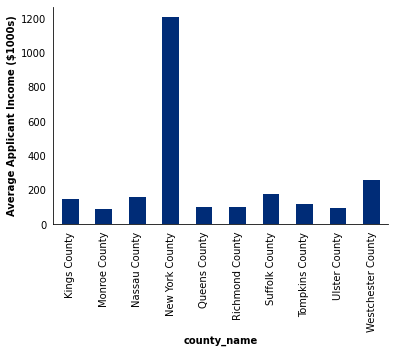

In [26]:
# Plot average income by top 10 more frequent counties
ax = summarized_data.plot(kind='bar')
ax.set_ylabel('Average Applicant Income ($1000s)')# Label the y-axis
plt.show()

**Adding a second axis to a bar plot, e.g. to show the number of data points in each bar**

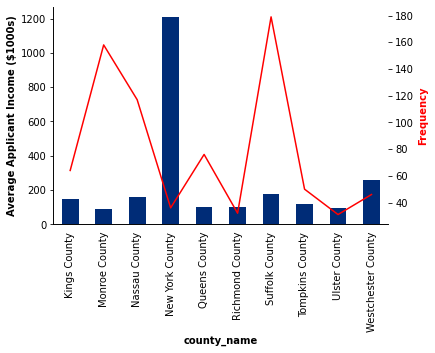

In [27]:
# Add number of observations to second axis of the bar plot
combined_summary = top_10_counties_data.groupby("county_name")['applicant_income_000s'].agg(mean=np.mean, count=len)

ax = combined_summary['mean'].plot(kind='bar')
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
combined_summary['count'].plot(color='red', ax=ax2)

ax.set_ylabel('Average Applicant Income ($1000s)')# Label the y-axis
ax2.set_ylabel('Frequency', color='red')

plt.show()

**Box and whisker plot provide more information about the distribution of the variable than just the average of each group**

Specifically, it provides the median, 25th and 75 percentiles, min and max, and outliers

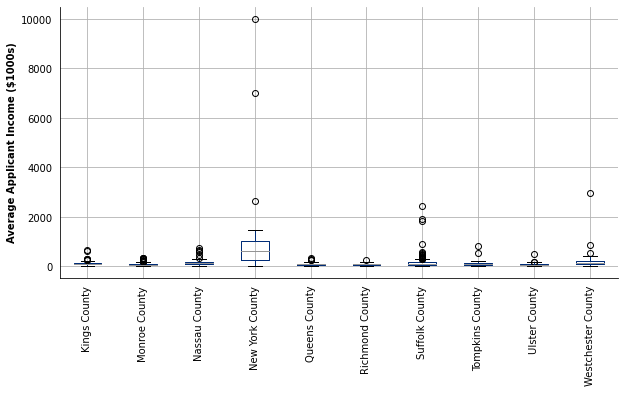

In [28]:
# Box and whisker plot
grouped_data = top_10_counties_data[['county_name','applicant_income_000s']].groupby("county_name")
ax = grouped_data.boxplot(subplots=False, figsize=(10,5))
ax.set_xticklabels(labels = grouped_data.groups.keys(),rotation = 90) # Rotate the x-axis labels, and clean up the labels
ax.set_ylabel('Average Applicant Income ($1000s)')# Label the y-axis
plt.show()

<a id='numerical_data_exploration_scatter'></a>
## Scatter plots for exploring relationship between two variables

Scatterplots are useful for examining the dependency / correlation between two numerical variables. However, patterns may be difficult to discern or may be misleading when there is a very large number of points plotted (e.g. overlapping points are not clearly visible). Other plots may be useful in such cases, e.g.:
* Heatmaps: https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set or https://seaborn.pydata.org/examples/heat_scatter.html
* Distribution plots: https://seaborn.pydata.org/generated/seaborn.displot.html

**We start with a basic scatter plot**

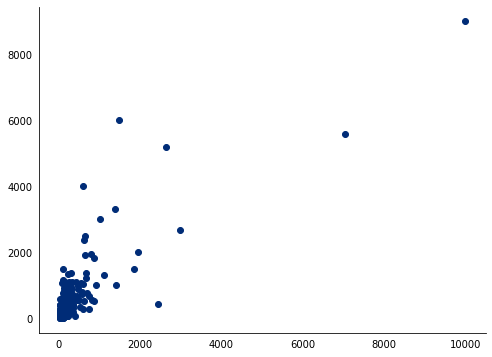

In [29]:
# Basic scatter plot showing correlation between Applicant Income and Loan Size
fig = plt.figure(figsize=(8,6))
plt.scatter(input_data.applicant_income_000s, input_data.loan_amount_000s)
plt.show()

**Add chart title, axes labels, and log-transform x and y axes, as well as provide a more distinctinve color**

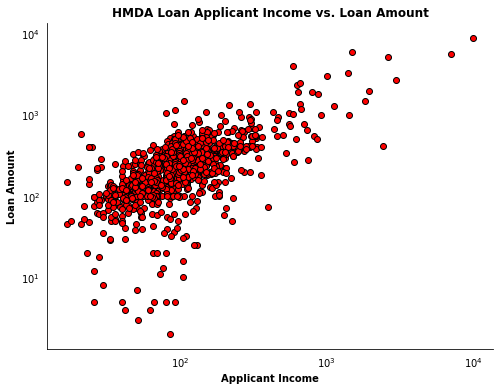

In [30]:
# We can log-transform the x and y-axes as well, and add title and labels

fig = plt.figure(figsize=(8,6)) # Set the figure size (width x height)
ax = fig.add_subplot(111) # 1 x 1 grid of charts, with this being plot #1 (the only plot), 
ax.scatter(input_data.applicant_income_000s, input_data.loan_amount_000s, c="red", edgecolors="black") #Change fill and edge
ax.set_xlabel('Applicant Income') # Label the x-axis
ax.set_ylabel('Loan Amount')# Label the y-axis
ax.set_title('HMDA Loan Applicant Income vs. Loan Amount') # Set the title

# Log-transform axes
ax.set_xscale('log')
ax.set_yscale('log')

# Display the current figure that you are working on. 
plt.show()


**Data can be segmented and plotted with separate colors. In this example, we generate plots for each of the most frequent 5 counties. There are several ways to accomplish this.**

More examples can be found at https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/

**Scatter plot of 5 groups with different colors using the colormap functionality**

This first example doesn't make use of loops, but plots all 5 groups at once.

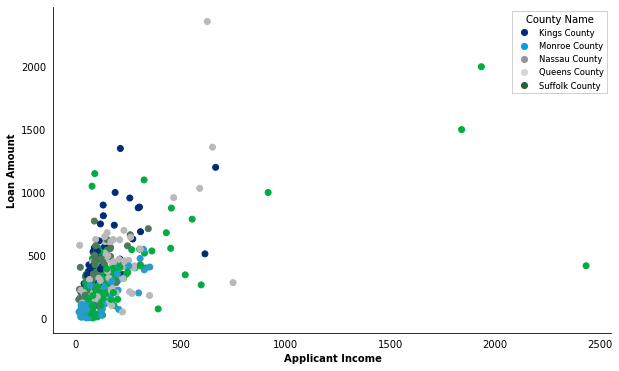

In [31]:
# Method without using any loop

fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

# Next, we need to get the unique list of states
counties_count = input_data['county_name'].value_counts()
top_5_counties = counties_count.index.tolist()[:5]
top_5_counties_data = input_data.loc[input_data['county_name'].isin(top_5_counties), ].copy()
top_5_counties_data['county_name'] = top_5_counties_data['county_name'].astype('category') # Convert to categorical
top_5_counties_data['county_code'] = top_5_counties_data['county_name'].cat.codes # Create an integer code for each county for use in coloring the scatterplot

scatter = ax.scatter(top_5_counties_data.applicant_income_000s, # X-values
                 top_5_counties_data.loan_amount_000s, # Y-values
                 c = top_5_counties_data.county_code, # Which 'group'
                 cmap = ow_colormap()) # Use OW colors

labels = top_5_counties_data['county_name'].cat.categories.tolist()
legend = ax.legend(scatter.legend_elements(num=len(labels))[0], labels, title="County Name", frameon=True)
ax.set_xlabel('Applicant Income') # Label the x-axis
ax.set_ylabel('Loan Amount')# Label the y-axis
ax.add_artist(legend)
plt.show()



**Scatter plot of multiple groups by using loop**

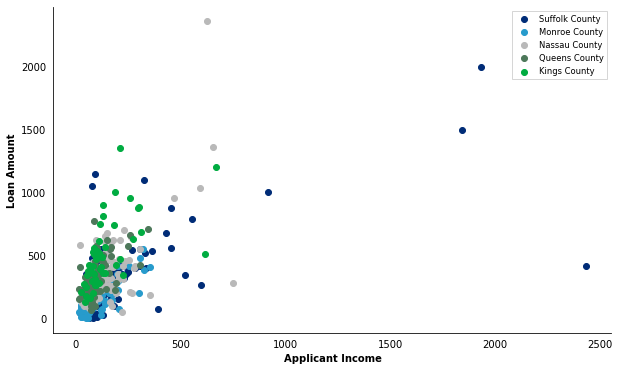

In [32]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

# Next, we need to get the unique list of states
counties_count = input_data['county_name'].value_counts()
top_5_counties = counties_count.index.tolist()[:5]

for i, county in enumerate(top_5_counties):
    
    county_data = input_data.loc[input_data.county_name == county,]
    
    ax.scatter(county_data.applicant_income_000s, 
               county_data.loan_amount_000s,
               color=ow_colormap()(i/(5-1)), # Provide the location of the color gradient: 0, 0.25, 0.5, 0.75, 1 for the 5 counties
               label=county)
ax.set_xlabel('Applicant Income') # Label the x-axis
ax.set_ylabel('Loan Amount')# Label the y-axis
ax.legend(frameon=True) # Box around legend
plt.show()

**We can plot two scatterplots side by side for a cleaner comparison of two counties**

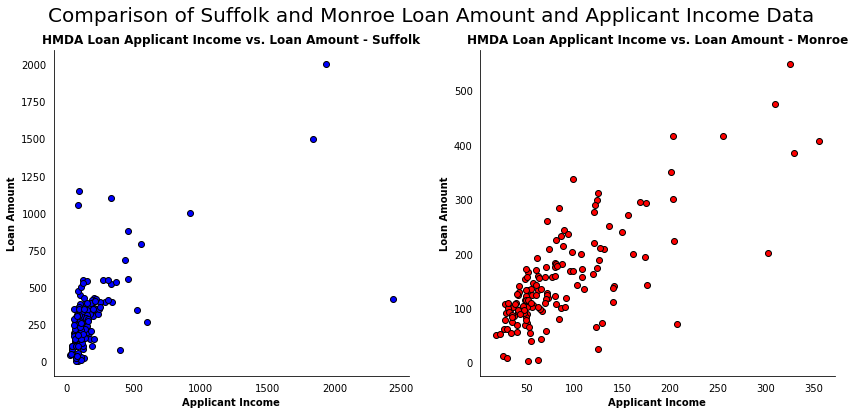

In [33]:
# Create fig and ax objects. Subplot arguments are 121 and 122, because we want two figures next to each other.
fig = plt.figure(figsize=(14,6))
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122)

# Filter the dataframe to the two main counties
suffolk_data = input_data.loc[input_data.county_name=="Suffolk County"]
monroe_data = input_data.loc[input_data.county_name=="Monroe County"]

# Create a scatter plot to show Albany county data
ax.scatter(suffolk_data.applicant_income_000s, suffolk_data.loan_amount_000s, c= "blue", edgecolors="black")

# Create a scatter plot to show Allegany County data
ax1.scatter(monroe_data.applicant_income_000s, monroe_data.loan_amount_000s, c= "red", edgecolors="black")

# Set title for entire figure
fig.suptitle("Comparison of Suffolk and Monroe Loan Amount and Applicant Income Data",fontsize="20")

# Set axes labels and title
ax.set_xlabel('Applicant Income') # Label the x-axis
ax.set_ylabel('Loan Amount')# Label the y-axis
ax.set_title('HMDA Loan Applicant Income vs. Loan Amount - Suffolk')

# Set axes labels and title
ax1.set_xlabel('Applicant Income') # Label the x-axis
ax1.set_ylabel('Loan Amount')# Label the y-axis
ax1.set_title('HMDA Loan Applicant Income vs. Loan Amount - Monroe')

# Display the figure 
plt.show()

<a href="#table_of_contents">(Back to top)</a>
<a id='categorical_data_exploration'></a>
# Exploration of categorical and string variables

This section provides examples of commonly used methods for exploring categorical / string data:
* Frequency table and bar plot
* Two-way frequency tables
* Multi-way frequency tables

<a id='categorical_data_exploration_frequency'></a>
## Frequency table and plot

pandas value_counts() method generates a frequency table, and can be applied to categorical and string variables. The results can furthermore be plotted as a barplot.

**Frequency of mortgage purchaser type name**

In [34]:
# Mortgage purchaser name
input_data.purchaser_type_name.value_counts()

Loan was not originated or was not sold in calendar year covered by register    432
Fannie Mae (FNMA)                                                               174
Freddie Mac (FHLMC)                                                              98
Ginnie Mae (GNMA)                                                                87
Commercial bank, savings bank or savings association                             71
Other type of purchaser                                                          50
Life insurance company, credit union, mortgage bank, or finance company          50
Affiliate institution                                                            34
Private securitization                                                            4
Name: purchaser_type_name, dtype: int64

**Frequency can be calculated on numerical data as well**

Typically this is used for discrete numerical fields (i.e. those that are treated as categorical), such as 'action_taken'. Sometimes it is used to find the most common N numbers for continuous fields (in some cases, specific values have special meaning), and the second example below identifies the top 5 values for loan_amount_000s.

In [35]:
# Action taken codes
input_data.action_taken.value_counts()

1    711
6    117
3     66
4     57
5     31
2     18
Name: action_taken, dtype: int64

In [36]:
# Top 3 most frequent loan_value amounts
input_data.loan_amount_000s.value_counts()[:3]

100    14
200    12
417    11
Name: loan_amount_000s, dtype: int64

**Bar plot can be generated using the .plot() method directly on the value_counts() outputs**

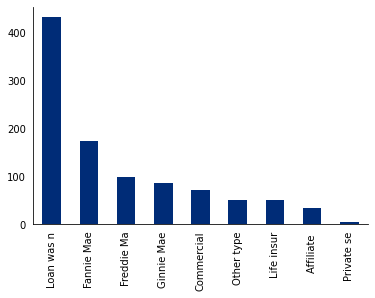

In [37]:
ax = input_data.purchaser_type_name.value_counts().plot(kind='bar')
ax.set_xticklabels(item.get_text()[:10] for item in ax.get_xticklabels()) # Shorten x-tick labels to 10 characters
plt.show()

<a id='categorical_data_exploration_twoway'></a>
## Two way tables

Two-way tables help analyze relationship between two categorical variables, showing the number of data points with specific values in two categorical variables. For variables with a large number of values, it may be helpful to consolidate the values by grouping them. 

In [38]:
pd.crosstab(input_data['purchaser_type_name'],input_data['action_taken_name'])

action_taken_name,Application approved but not accepted,Application denied by financial institution,Application withdrawn by applicant,File closed for incompleteness,Loan originated,Loan purchased by the institution
purchaser_type_name,,,,,,
Affiliate institution,0,0,0,0,32,2
"Commercial bank, savings bank or savings association",0,0,0,0,66,5
Fannie Mae (FNMA),0,0,0,0,141,33
Freddie Mac (FHLMC),0,0,0,0,72,26
Ginnie Mae (GNMA),0,0,0,0,62,25
"Life insurance company, credit union, mortgage bank, or finance company",0,0,0,0,48,2
Loan was not originated or was not sold in calendar year covered by register,18,66,57,31,237,23
Other type of purchaser,0,0,0,0,49,1
Private securitization,0,0,0,0,4,0


**Instead of counts, percentages can be requested as well**

In [39]:
pd.crosstab(input_data['purchaser_type_name'],input_data['action_taken_name'], normalize=True)

action_taken_name,Application approved but not accepted,Application denied by financial institution,Application withdrawn by applicant,File closed for incompleteness,Loan originated,Loan purchased by the institution
purchaser_type_name,,,,,,
Affiliate institution,0.000,0.000,0.000,0.000,0.032,0.002
"Commercial bank, savings bank or savings association",0.000,0.000,0.000,0.000,0.066,0.005
Fannie Mae (FNMA),0.000,0.000,0.000,0.000,0.141,0.033
Freddie Mac (FHLMC),0.000,0.000,0.000,0.000,0.072,0.026
Ginnie Mae (GNMA),0.000,0.000,0.000,0.000,0.062,0.025
"Life insurance company, credit union, mortgage bank, or finance company",0.000,0.000,0.000,0.000,0.048,0.002
Loan was not originated or was not sold in calendar year covered by register,0.018,0.066,0.057,0.031,0.237,0.023
Other type of purchaser,0.000,0.000,0.000,0.000,0.049,0.001
Private securitization,0.000,0.000,0.000,0.000,0.004,0.000


**Note about crosstab**

In some cases it may be helpful to add row/column totals, as well as normalize by row or column. See https://datagy.io/pandas-crosstab/ for more examples

<a id='categorical_data_exploration_multiway'></a>
## Multi-way tables using groupby

**More variables can be included in a multi-way table, similar to a pivot table in Excel**

This is accomplished by using groupby() on a pandas dataframe and getting the 'size' of each. 

In [40]:
threeway_table = input_data.groupby(["property_type_name", "owner_occupancy_name", "action_taken_name"], dropna=False).size().reset_index(name="Count")
threeway_table.head(10)

,property_type_name,owner_occupancy_name,action_taken_name,Count
0,Manufactured housing,Not owner-occupied as a principal dwelling,Loan originated,1
1,Manufactured housing,Owner-occupied as a principal dwelling,Application denied by financial institution,2
2,Manufactured housing,Owner-occupied as a principal dwelling,Loan originated,1
3,Multifamily dwelling,Not applicable,Loan originated,9
4,Multifamily dwelling,Not owner-occupied as a principal dwelling,Loan originated,2
5,One-to-four family dwelling (other than manufa...,Not applicable,Application approved but not accepted,1
6,One-to-four family dwelling (other than manufa...,Not applicable,Loan originated,1
7,One-to-four family dwelling (other than manufa...,Not owner-occupied as a principal dwelling,Application approved but not accepted,2
8,One-to-four family dwelling (other than manufa...,Not owner-occupied as a principal dwelling,Application denied by financial institution,4
9,One-to-four family dwelling (other than manufa...,Not owner-occupied as a principal dwelling,Application withdrawn by applicant,5


**Tables can be reshaped such that a variable becomes the 'column index' for a more cleaner view**

In this example keep "property_type_name", "owner_occupancy_name" as row indices, with 'action_taken_name' as the column index

In [41]:
threeway_table.pivot(index=["property_type_name", "owner_occupancy_name"], columns='action_taken_name', values="Count").fillna(0)

action_taken_name                                                                              Application approved but not accepted  \
property_type_name                                 owner_occupancy_name                                                                
Manufactured housing                               Not owner-occupied as a principal dwelling                                    0.0   
                                                   Owner-occupied as a principal dwelling                                        0.0   
Multifamily dwelling                               Not applicable                                                                0.0   
                                                   Not owner-occupied as a principal dwelling                                    0.0   
One-to-four family dwelling (other than manufac... Not applicable                                                                1.0   
                                                   Not owner-occupied as a principal dwelling                                    2.0   
                                                   Owner-occupied as a principal dwelling                                       15.0   

action_taken_name                                                                              Application denied by financial institution  \
property_type_name                                 owner_occupancy_name                                                                      
Manufactured housing                               Not owner-occupied as a principal dwelling                                          0.0   
                                                   Owner-occupied as a principal dwelling                                              2.0   
Multifamily dwelling                               Not applicable                                                                      0.0   
                                                   Not owner-occupied as a principal dwelling                                          0.0   
One-to-four family dwelling (other than manufac... Not applicable                                                                      0.0   
                                                   Not owner-occupied as a principal dwelling                                          4.0   
                                                   Owner-occupied as a principal dwelling                                             60.0   

action_taken_name                                                                              Application withdrawn by applicant  \
property_type_name                                 owner_occupancy_name                                                             
Manufactured housing                               Not owner-occupied as a principal dwelling                                 0.0   
                                                   Owner-occupied as a principal dwelling                                     0.0   
Multifamily dwelling                               Not applicable                                                             0.0   
                                                   Not owner-occupied as a principal dwelling                                 0.0   
One-to-four family dwelling (other than manufac... Not applicable                                                             0.0   
                                                   Not owner-occupied as a principal dwelling                                 5.0   
                                                   Owner-occupied as a principal dwelling                                    52.0   

action_taken_name                                                                              File closed for incompleteness  \
property_type_name                                 owner_occupancy_name                                                         
Manufactured housing                    